In [1]:
#animation of results
from anemoi.datasets import open_dataset
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cmocean  
import numpy as np 
import sys
import xarray as xr

In [ ]:
ds = xr.open_mfdataset(['/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240402.nc', '/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240403.nc']).isel(s_rho=-1)
ds_var = ds["zeta"].resample(time='3H').mean(dim='time')
#ds_var.transpose().values
zeta = np.array(ds_var.values)
zeta = zeta.reshape(zeta.shape[-3],-3)
#zeta = np.pad(zeta, pad_width=0, mode='constant', constant_values=0)
zeta

/lustre/storeB/project/fou/hi/foccus/.venv/lib64/python3.11/site-packages/xarray/groupers.py:487: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


array([[        nan,         nan,         nan, ..., -0.8666666 ,
        -0.8666666 , -0.8666666 ],
       [        nan,         nan,         nan, ..., -0.4466667 ,
        -0.4466667 , -0.4466667 ],
       [        nan,         nan,         nan, ..., -0.42      ,
        -0.42      , -0.42      ],
       ...,
       [        nan,         nan,         nan, ..., -0.7733333 ,
        -0.77      , -0.77      ],
       [        nan,         nan,         nan, ..., -0.46333334,
        -0.46333334, -0.46333334],
       [        nan,         nan,         nan, ..., -0.58666664,
        -0.58666664, -0.58666664]], shape=(16, 3153556), dtype=float32)

In [ ]:
lon = ds["lon"]
lat = ds["lat"]

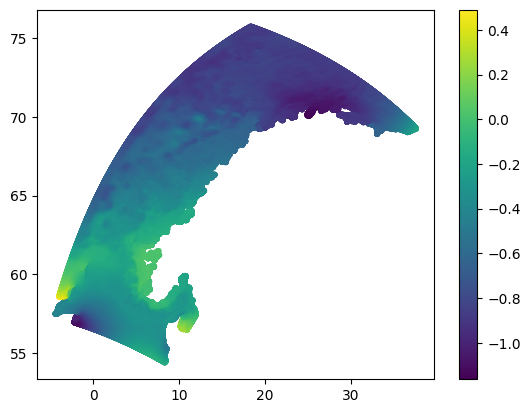

In [26]:
plt.scatter(lon, lat, c=zeta[0], s=10)
plt.colorbar()

In [40]:
def results_animation(file_path1, file_path2 ,variable, dir, frame, start_time, **kwargs):
    ds = xr.open_mfdataset([file_path1, file_path2]).isel(s_rho=-1)
    ds_var = ds[f'{variable}'].resample(time='3H').mean(dim='time')
    ds_var = np.array(ds_var)
    ds_var = ds_var.reshape(ds_var.shape[-3], -3)
    print(ds_var.shape)
    longitude = ds["lon"]
    latitude = ds["lat"]
    fig,ax = plt.subplots(figsize = (12,8))
    sc = ax.scatter(longitude.values, latitude.values, c=ds_var[start_time], cmap = cmocean.cm.speed, **kwargs)
    cbar = plt.colorbar(sc, ax=ax, orientation = "vertical", label = variable)
        
    def update(frame):
        sc.set_array(ds_var[frame])
        ax.set_title(f'Time step: {frame *3} hrs')
        ax.set_xlabel(f'Longitude [$\circ$]')
        ax.set_ylabel(f'Latitude [$\circ$]')
        return sc 
    
    ani = FuncAnimation(fig, update, frames=range(frame), interval = 400)
    ani.save(f'{dir}/animation_{variable}.gif', writer="imagemagick")

/lustre/storeB/project/fou/hi/foccus/.venv/lib64/python3.11/site-packages/xarray/groupers.py:487: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


(16, 3153556)


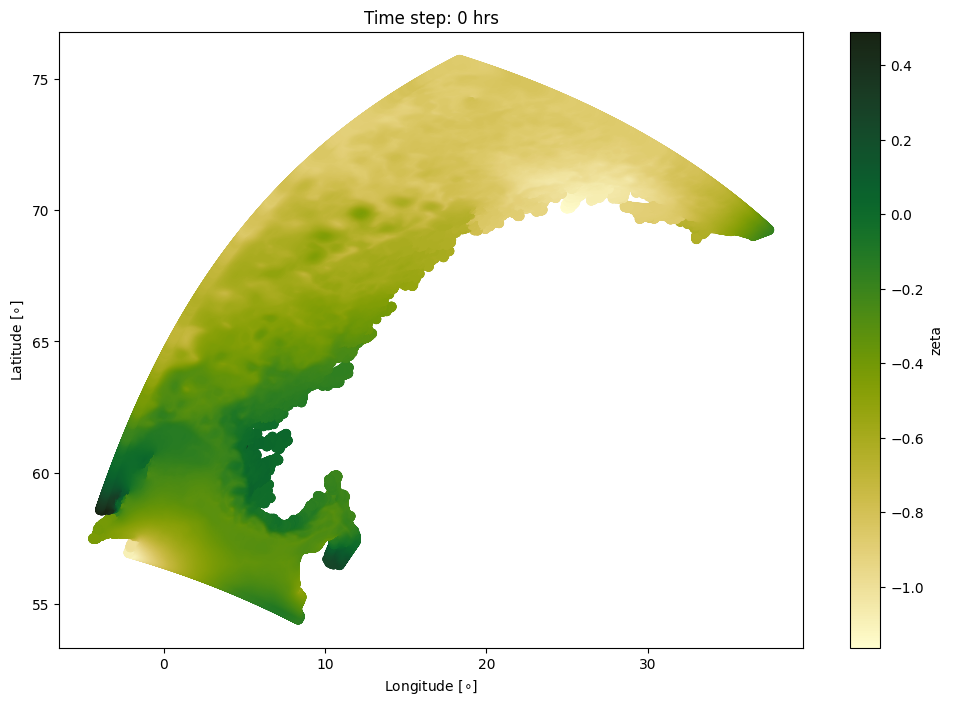

In [41]:
results_animation(file_path1='/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240402.nc', file_path2='/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240403.nc', variable='zeta', dir='/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/figures', frame=16, start_time=0)

In [42]:
#klarte å erstatte zeta for resultatfilene så plotter raskt for zeta ngpus også

In [44]:
from script_animation_results import results_animation

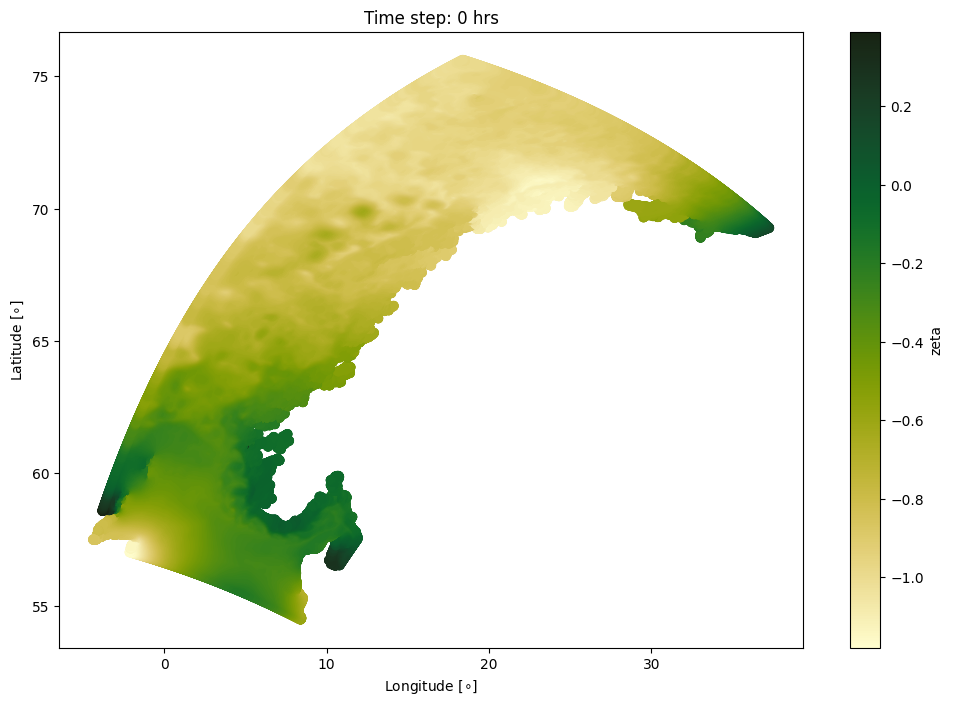

In [46]:
results_animation(file_path='/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc', variable="zeta", dir='/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/figures', start_time=0, frame=16)

In [1]:
from script_animation_results import animation_compare

/lustre/storeB/project/fou/hi/foccus/.venv/lib64/python3.11/site-packages/xarray/groupers.py:487: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


Image 1 - før
lon: (3076056,), lat: (3076056,), ds1_var_vals: (16, 3153556)
Image 1 - etter
ds_var_vals:(16, 3153556), lon: (1148, 2747), lat: (1148, 2747)
Image 2 - etter
Image 3 - før


ValueError: 'c' argument has 50456896 elements, which is inconsistent with 'x' and 'y' with size 3153556.

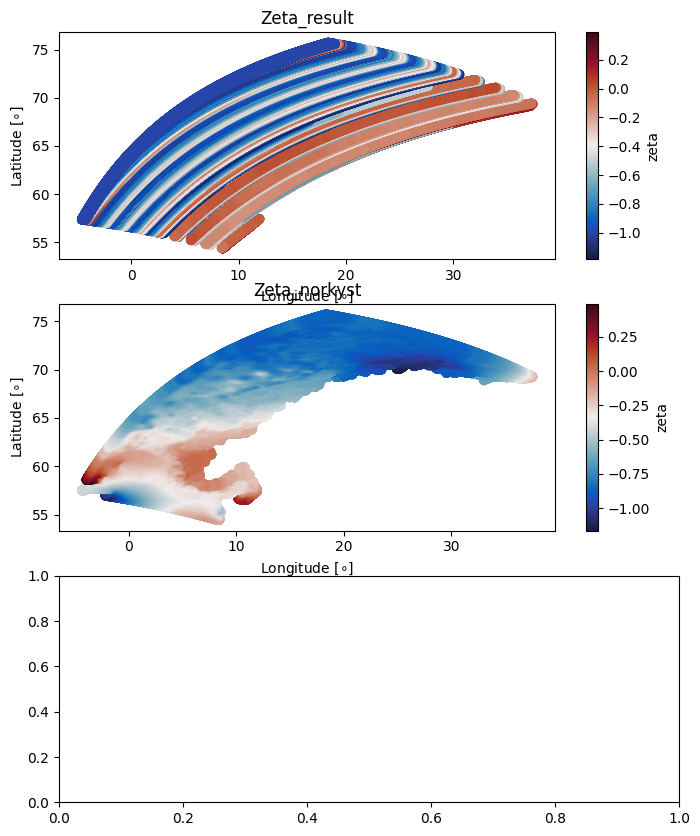

In [2]:
animation_compare(file_path_1='/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc', file_path_2='/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240402.nc', file_path_3='/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240403.nc', variable1="zeta", variable2="zeta", dir='/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/figures', frame=16, start_time=0, title1='Zeta_result', title2='Zeta_norkyst')

In [7]:
res = xr.open_dataset(f'/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc').isel(time=slice(0,16))
res.time

<xarray.DataArray 'time' (time: 16)> Size: 128B
array(['2024-04-02T00:00:00.000000000', '2024-04-02T03:00:00.000000000',
       '2024-04-02T06:00:00.000000000', '2024-04-02T09:00:00.000000000',
       '2024-04-02T12:00:00.000000000', '2024-04-02T15:00:00.000000000',
       '2024-04-02T18:00:00.000000000', '2024-04-02T21:00:00.000000000',
       '2024-04-03T00:00:00.000000000', '2024-04-03T03:00:00.000000000',
       '2024-04-03T06:00:00.000000000', '2024-04-03T09:00:00.000000000',
       '2024-04-03T12:00:00.000000000', '2024-04-03T15:00:00.000000000',
       '2024-04-03T18:00:00.000000000', '2024-04-03T21:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 128B 2024-04-02 ... 2024-04-03T21:00:00
Attributes:
    long_name:  time

In [58]:
#resultfile
res.zeta.shape
res_zeta = res["zeta"]
#res_zeta = np.array(res_zeta)
res_zeta = res_zeta.pad(values=(0,77500), constant_values=0)#, pad_width=10, mode='constant', constant_values=0)
res_zeta.shape


(16, 3153556)

ValueError: s must be a scalar, or float array-like with the same size as x and y

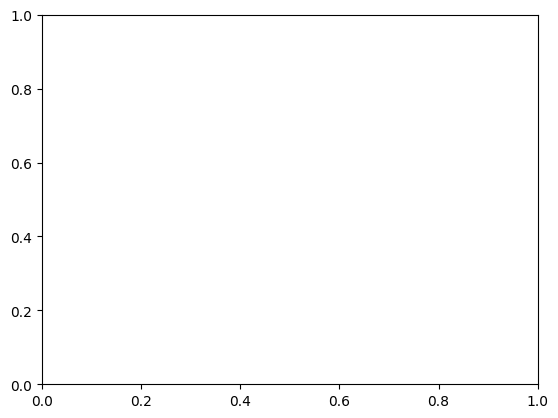

In [60]:
plt.scatter(ds["lon"],ds["lat"],res_zeta)

/lustre/storeB/project/fou/hi/foccus/.venv/lib64/python3.11/site-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


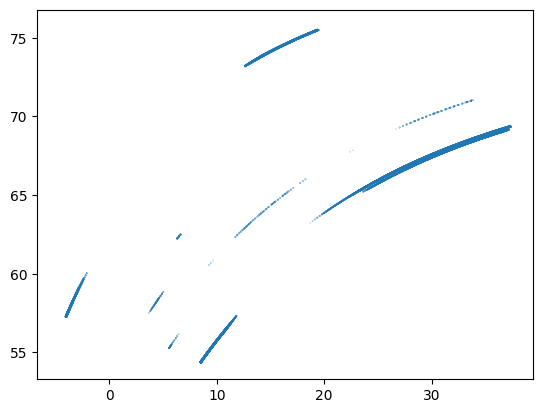

In [59]:
plt.scatter(ds["lon"], ds["lat"], res_zeta[0])

In [49]:
#norkyst
ds_var.shape
zeta = np.array(ds_var.values)
zeta = zeta.reshape(zeta.shape[-3],-3)
zeta.shape

(16, 3153556)

In [50]:
diff = zeta - res_zeta

In [51]:
diff.shape
ds_var["X"].shape
ds_var["Y"].shape
ds_var= ds_var.transpose()
ds = ds.transpose()

print(f'Length of lon: {ds["lon"]}')


Length of lon: <xarray.DataArray 'lon' (X: 2747, Y: 1148)> Size: 25MB
dask.array<transpose, shape=(2747, 1148), dtype=float64, chunksize=(2747, 24), chunktype=numpy.ndarray>
Coordinates:
    s_rho    float64 8B -0.004904
  * X        (X) float64 22kB 0.0 800.0 1.6e+03 ... 2.196e+06 2.197e+06
  * Y        (Y) float64 9kB 0.0 800.0 1.6e+03 ... 9.16e+05 9.168e+05 9.176e+05
    lon      (X, Y) float64 25MB dask.array<chunksize=(2747, 24), meta=np.ndarray>
    lat      (X, Y) float64 25MB dask.array<chunksize=(2747, 24), meta=np.ndarray>
Attributes:
    units:          degree_east
    long_name:      longitude
    standard_name:  longitude
    field:          lon, scalar


In [ ]:
ds = xr.open_mfdataset(['/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240402.nc', '/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240403.nc']).isel(s_rho=-1)
ds_var = ds["zeta"].resample(time='3H').mean(dim='time')
ds.var.shape
zeta = np.array(ds_var.values)
zeta = zeta.reshape(zeta.shape[-3],-3)
zeta = np.pad(zeta, pad_width=0, mode='constant', constant_values=0)
zeta.shape

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3080575982.py, line 8)

In [53]:
diff = diff.reshape(16,1148,2747)

In [54]:
print(f'shape of diff: {diff.ravel().shape}')
print(f'shape of X: {ds["X"].shape}')
print(f'shape of Y: {ds["Y"].shape}')
print(f'shape of lon: {ds["lon"].transpose().shape}')
print(f'shape of lat: {ds["lat"].transpose().shape}')

shape of diff: (50456896,)
shape of X: (2747,)
shape of Y: (1148,)
shape of lon: (2747, 1148)
shape of lat: (2747, 1148)


/lustre/storeB/project/fou/hi/foccus/.venv/lib64/python3.11/site-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


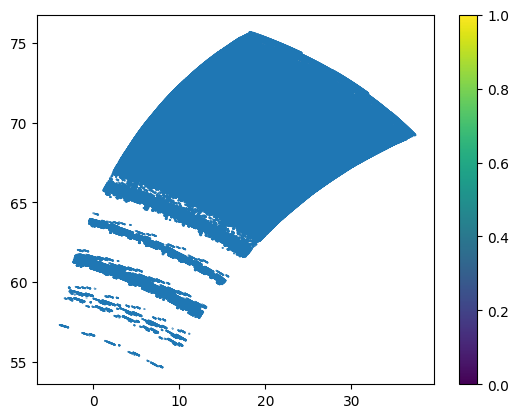

In [74]:
diff = diff.reshape(16,1148,2747)
plt.scatter(ds["lon"].transpose(), ds["lat"].transpose(), diff[0].flatten())
plt.colorbar()

In [66]:
diff.shape

(16, 1148, 2747)

In [40]:
def compare_two(file_path_1, file_path_2, file_path_3, variable1, variable2, dir, frame, start_time, title1, title2, **kwargs):
    ds1 = xr.open_dataset(file_path_1, engine = "netcdf4").isel(time=slice(0,16))
    ds2 = xr.open_mfdataset([file_path_2,file_path_3]).isel(s_rho=-1)
    ds1_var = ds1[f'{variable1}']
    #ds1_var = np.array(ds1_var)
    ds1_var = ds1_var.pad(values=(0,77500), constant_values=0)#(ds1_var, ((0,0), (0,77500)), mode = "edge")
    ds2_var = ds2[f'{variable2}'].resample(time='3H').mean(dim='time')
    #ds2_var = np.array(ds2_var)
    #ds2_var = ds2_var.reshape(ds2_var.shape[-3],-3)
    print(f'Original dims ds2: {ds2_var}')
    #ds2_var = ds2_var.stack(flattened_values = ('X', 'Y'))
    #ds2_var = ds2_var.rename({'flattened_values':'values'})
    #ds1_var = ds1_var.reindex_like(ds2_var, method = 'nearest', fill_value=0)
    print(f' ds1 dims: {ds1_var.dims}')
    print(f' ds2 dims: {ds2_var.dims}')
    print(f'Shape ds2: {ds2_var.shape}')
    print(f'Shape ds1: {ds1_var.shape}')
    longitude = ds1["longitude"] 
    latitude = ds1["latitude"]
    lon = ds2["lon"]
    lat = ds2["lat"]
    fig,ax = plt.subplots(2, figsize = (8,10))

    if variable1 in ["temperature_0","Tair" ] or variable2 in ["temperature_0", "Tair"]:
        cmap = cmocean.cm.thermal
    elif variable1 in ["salinity_0"] or variable2 in ["salinity_0"]:
        cmap = cmocean.cm.haline
    elif variable1 in ["u_eastward_0", "v_northward_0", "Uwind","Vwind"] or variable2 in ["u_eastward_0", "v_northward_0", "Uwind", "Vwind"]:
        cmap = cmocean.cm.speed
    elif variable1 in ["rain", "cloud", "Qair"] or variable2 in ["rain", "cloud", "Qair"]:
        cmap = cmocean.cm.rain
    elif variable1 in ["zeta"] or variable2 in ["zeta"]:
        cmap = cmocean.cm.balance
    elif variable1 in ["Insolation"] or variable2 in ["Insolation"]:
        cmap = cmocean.cm.solar
    elif variable1 in ["Pair"] or variable2 in ["Pair"]:
        cmap = cmocean.cm.dense

    #image1
    print(f'Image 1 - før')
    print(f'lon: {longitude.shape}, lat: {latitude.shape}, ds1_var_vals: {ds1_var.shape}')
    image1 = ax[0].scatter(lon, lat, c=ds1_var[start_time], cmap = cmap, **kwargs)
    cbar1 = plt.colorbar(image1, ax=ax[0], label = f'{variable1}')
    ax[0].set_title(title1)
    ax[0].set_xlabel(f'Longitude [$\circ$]')
    ax[0].set_ylabel(f'Latitude [$\circ$]') 
    print(f'Image 1 - etter')

    #image2 
    print(f'ds_var_vals:{ds2_var.shape}, lon: {lon.shape}, lat: {lat.shape}')
    image2 = ax[1].scatter(lon, lat, c=ds2_var[start_time], cmap = cmap, **kwargs)
    cbar2 = plt.colorbar(image2, ax=ax[1], label = f'{variable2}')
    ax[1].set_title(title2)
    ax[1].set_xlabel(f'Longitude [$\circ$]')
    ax[1].set_ylabel(f'Latitude [$\circ]$')
    print(f'Image 2 - etter')

    image = [image1,image2]
    ds = [ds1_var, ds2_var]

    def update(frame):
        for axis, img, ds_data in zip(ax,image,ds):
            img.set_array(ds_data[frame])
            axis.set_title(f'"Time step: {frame *3} hrs')
            axis.set_xlabel(f'Longitude [$\circ$]')
            axis.set_ylabel(f'Latitude [$\circ$]')
        return image
    plt.tight_layout()
    ani = FuncAnimation(fig,update, frames=range(frame), interval = 400, blit = True)
    ani.save(f'{dir}/diff_animation_results_{variable1}_{variable2}.gif', writer="imagemagick")
    

In [41]:
compare_two(file_path_1='/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc', file_path_2='/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240402.nc', file_path_3='/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240403.nc', variable1="zeta", variable2="zeta", dir='/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/figures', frame=16, start_time=0, title1='Zeta_result', title2='Zeta_norkyst')

/lustre/storeB/project/fou/hi/foccus/.venv/lib64/python3.11/site-packages/xarray/groupers.py:487: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


Original dims ds2: <xarray.DataArray 'zeta' (time: 16, Y: 1148, X: 2747)> Size: 202MB
dask.array<stack, shape=(16, 1148, 2747), dtype=float32, chunksize=(1, 24, 2747), chunktype=numpy.ndarray>
Coordinates:
    s_rho    float64 8B -0.004904
  * X        (X) float64 22kB 0.0 800.0 1.6e+03 ... 2.196e+06 2.197e+06
  * Y        (Y) float64 9kB 0.0 800.0 1.6e+03 ... 9.16e+05 9.168e+05 9.176e+05
    lon      (Y, X) float64 25MB dask.array<chunksize=(24, 2747), meta=np.ndarray>
    lat      (Y, X) float64 25MB dask.array<chunksize=(24, 2747), meta=np.ndarray>
  * time     (time) datetime64[ns] 128B 2024-04-02 ... 2024-04-03T21:00:00
Attributes:
    units:                  meter
    grid:                   grid
    location:               face
    field:                  free-surface, scalar, series
    grid_mapping:           projection_stere
    long_name:              free surface elevation with respect to sea level ...
    standard_name:          sea_surface_height_above_geopotential_datum


MovieWriter stderr:
convert: unexpected end-of-file `-': No such file or directory @ error/rgb.c/ReadRGBImage/252.
convert: no images defined `/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/figures/diff_animation_results_zeta_zeta.gif' @ error/convert.c/ConvertImageCommand/3234.



CalledProcessError: Command '['convert', '-size', '800x1000', '-depth', '8', '-delay', '40.0', '-loop', '0', 'rgba:-', '-layers', 'OptimizePlus', '/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/figures/diff_animation_results_zeta_zeta.gif']' returned non-zero exit status 1.

ValueError: Collections can only map rank 1 arrays

<Figure size 800x1000 with 4 Axes>

In [4]:
def compare_two_tryagain(file_path_1, file_path_2, file_path_3, variable1, variable2, dir, frame, start_time, title1, title2, **kwargs):
    ds1 = xr.open_dataset(file_path_1, engine = "netcdf4").isel(time=slice(0,16))
    ds2 = xr.open_mfdataset([file_path_2,file_path_3]).isel(s_rho=-1)
    ds1_var = ds1[f'{variable1}']
    ds2_var = ds2[f'{variable2}'].resample(time='3H').mean(dim='time')
    ds2_var = np.array(ds2_var)
    ds2_var = ds2_var.reshape(ds2_var.shape[-3], -3)
    longitude = ds1["longitude"] 
    latitude = ds1["latitude"]
    lon = ds2["lon"].values
    lat = ds2["lat"].values
    fig,ax = plt.subplots(2, figsize = (8,10))

    if variable1 in ["temperature_0","Tair" ] or variable2 in ["temperature_0", "Tair"]:
        cmap = cmocean.cm.thermal
    elif variable1 in ["salinity_0"] or variable2 in ["salinity_0"]:
        cmap = cmocean.cm.haline
    elif variable1 in ["u_eastward_0", "v_northward_0", "Uwind","Vwind"] or variable2 in ["u_eastward_0", "v_northward_0", "Uwind", "Vwind"]:
        cmap = cmocean.cm.speed
    elif variable1 in ["rain", "cloud", "Qair"] or variable2 in ["rain", "cloud", "Qair"]:
        cmap = cmocean.cm.rain
    elif variable1 in ["zeta"] or variable2 in ["zeta"]:
        cmap = cmocean.cm.balance
    elif variable1 in ["Insolation"] or variable2 in ["Insolation"]:
        cmap = cmocean.cm.solar
    elif variable1 in ["Pair"] or variable2 in ["Pair"]:
        cmap = cmocean.cm.dense

    #image1
    print(f'Image 1 - før')
    print(f'lon: {longitude.shape}, lat: {latitude.shape}, ds1_var_vals: {ds1_var.shape}')
    image1 = ax[0].scatter(longitude.values, latitude.values, c=ds1_var[start_time].values, cmap = cmap, **kwargs)
    cbar1 = plt.colorbar(image1, ax=ax[0], label = f'{variable1}')
    ax[0].set_title(title1)
    ax[0].set_xlabel(f'Longitude [$\circ$]')
    ax[0].set_ylabel(f'Latitude [$\circ$]') 
    print(f'Image 1 - etter')
    
    #image2 
    print(f'ds_var_vals:{ds2_var.shape}, lon: {lon.shape}, lat: {lat.shape}')
    image2 = ax[1].scatter(lon, lat, c=ds2_var[start_time], cmap = cmap, **kwargs)
    cbar2 = plt.colorbar(image2, ax=ax[1], label = f'{variable2}')
    ax[1].set_title(title2)
    ax[1].set_xlabel(f'Longitude [$\circ$]')
    ax[1].set_ylabel(f'Latitude [$\circ]$')
    print(f'Image 2 - etter')

    image = [image1,image2]
    ds = [ds1_var, ds2_var]

    def update(frame):
        for axis, img, ds_data in zip(ax,image,ds):
            img.set_array(ds_data[frame])
            axis.set_title(f'"Time step: {frame *3} hrs')
            axis.set_xlabel(f'Longitude [$\circ$]')
            axis.set_ylabel(f'Latitude [$\circ$]')
        return image
    plt.tight_layout()
    ani = FuncAnimation(fig,update, frames=range(frame), interval = 400, blit = True)
    ani.save(f'{dir}/diff_animation_results_{variable1}_{variable2}.gif', writer="imagemagick")
    
    

/lustre/storeB/project/fou/hi/foccus/.venv/lib64/python3.11/site-packages/xarray/groupers.py:487: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


Image 1 - før
lon: (3076056,), lat: (3076056,), ds1_var_vals: (16, 3076056)
Image 1 - etter
ds_var_vals:(16, 3153556), lon: (1148, 2747), lat: (1148, 2747)
Image 2 - etter


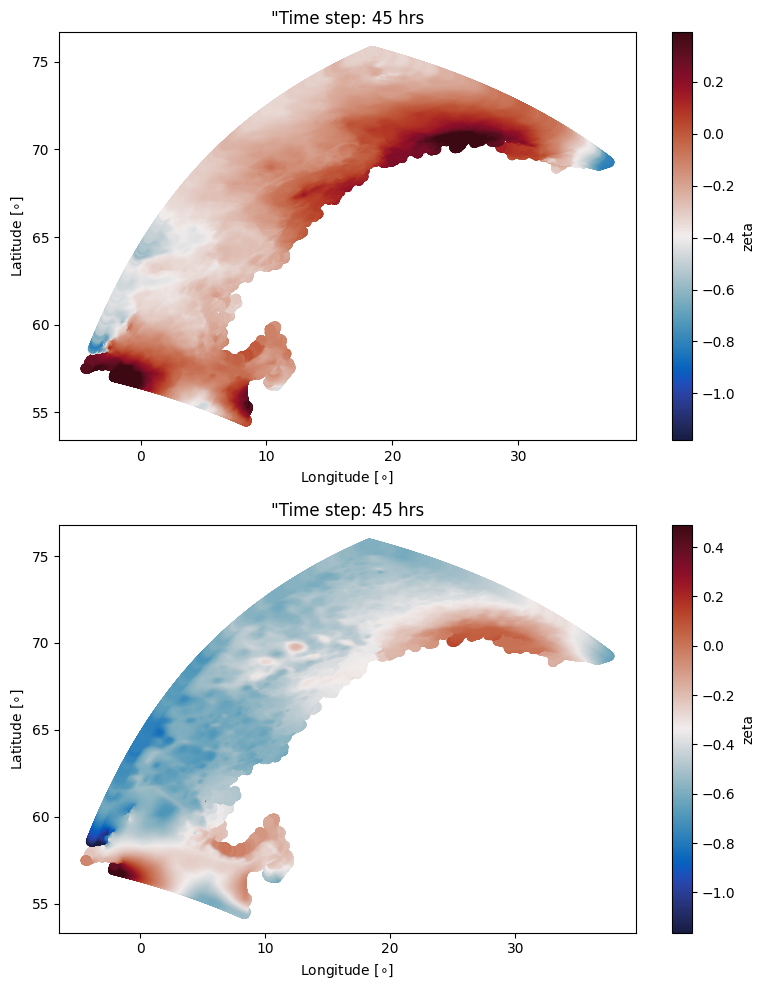

In [5]:
compare_two_tryagain(file_path_1='/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc', file_path_2='/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240402.nc', file_path_3='/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240403.nc', variable1="zeta", variable2="zeta", dir='/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/figures', frame=16, start_time=0, title1='Zeta_result', title2='Zeta_norkyst')

In [1]:
from script_animation_results import compare_two

/lustre/storeB/project/fou/hi/foccus/.venv/lib64/python3.11/site-packages/xarray/groupers.py:487: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


Image 1 - before
lon: (3076056,), lat: (3076056,), ds1_var_vals: (16, 3076056)
Image 1 - after
ds_var_vals:(16, 3153556), lon: (1148, 2747), lat: (1148, 2747)
Image 2 - after


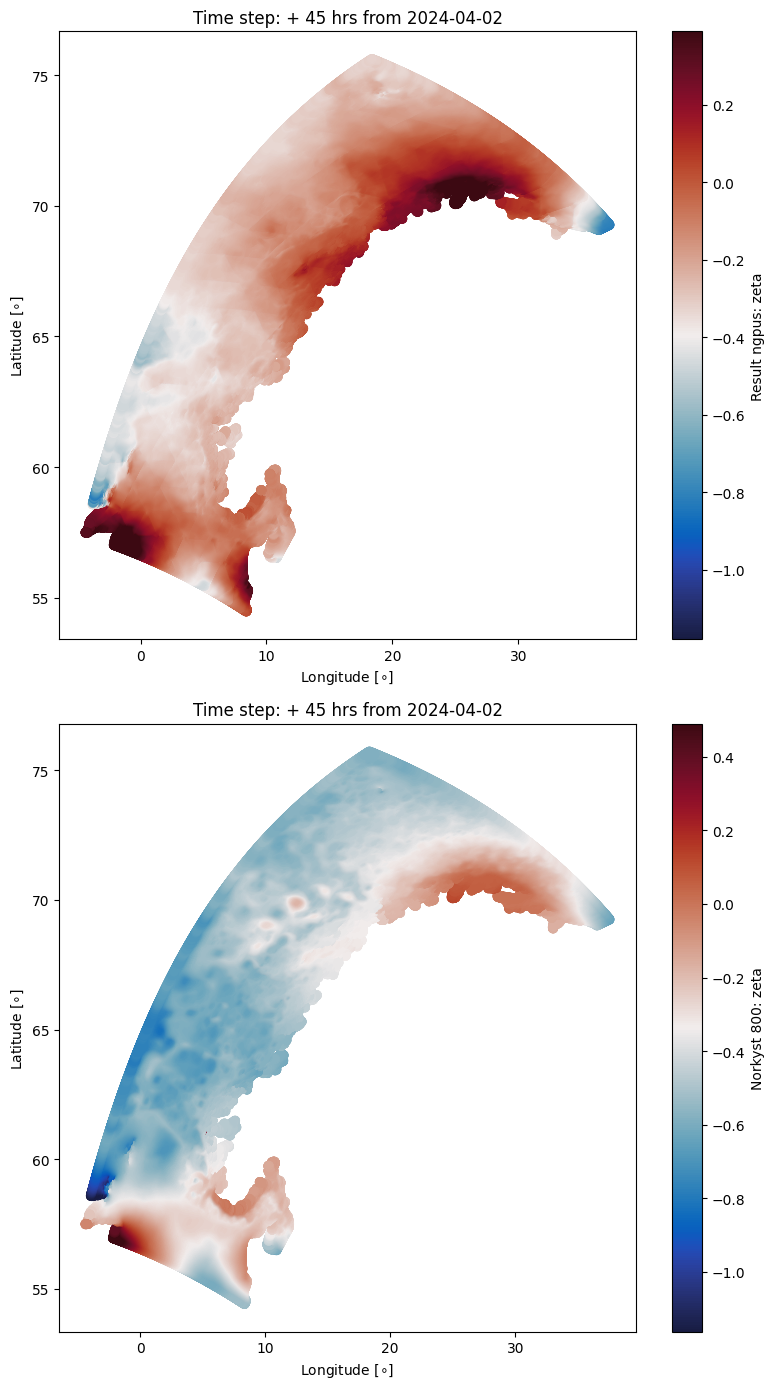

In [3]:
compare_two(file_path_1='/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc', file_path_2='/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240402.nc', file_path_3='/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240403.nc', variable1="zeta", variable2="zeta", dir='/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/figures', frame=16, start_time=0, title1='Zeta_result', title2='Zeta_norkyst')

/lustre/storeB/project/fou/hi/foccus/.venv/lib64/python3.11/site-packages/xarray/groupers.py:487: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


Image 1 - before
lon: (3076056,), lat: (3076056,), ds1_var_vals: (16, 3076056)
Image 1 - after
ds_var_vals:(16, 3153556), lon: (1148, 2747), lat: (1148, 2747)
Image 2 - after


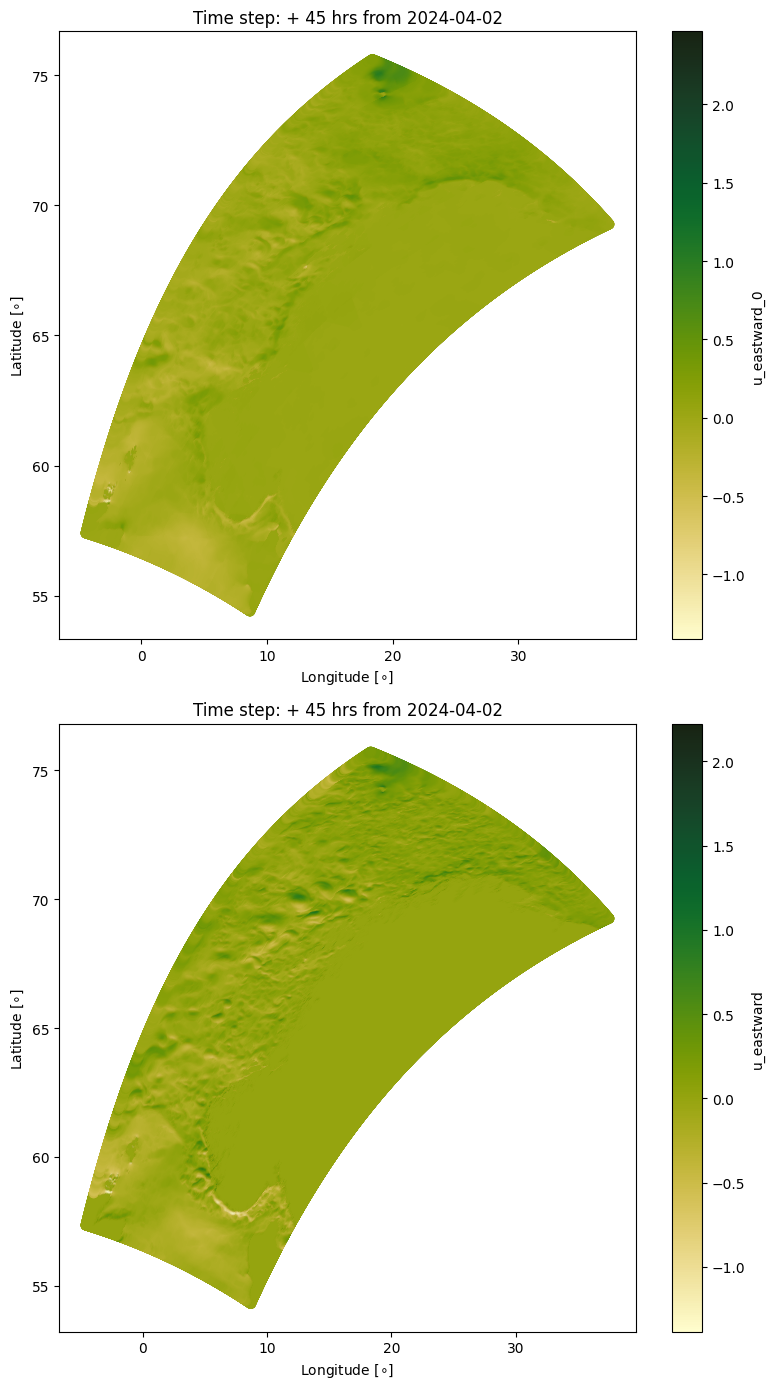

In [2]:
compare_two(file_path_1='/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc', file_path_2='/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240402.nc', file_path_3='/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240403.nc', variable1="u_eastward_0", variable2="u_eastward", dir='/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/figures', frame=16, start_time=0, title1='Uspeed_result', title2='Uspeed_norkyst')

/lustre/storeB/project/fou/hi/foccus/.venv/lib64/python3.11/site-packages/xarray/groupers.py:487: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


Image 1 - before
lon: (3076056,), lat: (3076056,), ds1_var_vals: (16, 3076056)
Image 1 - after
ds_var_vals:(16, 3153556), lon: (1148, 2747), lat: (1148, 2747)
Image 2 - after


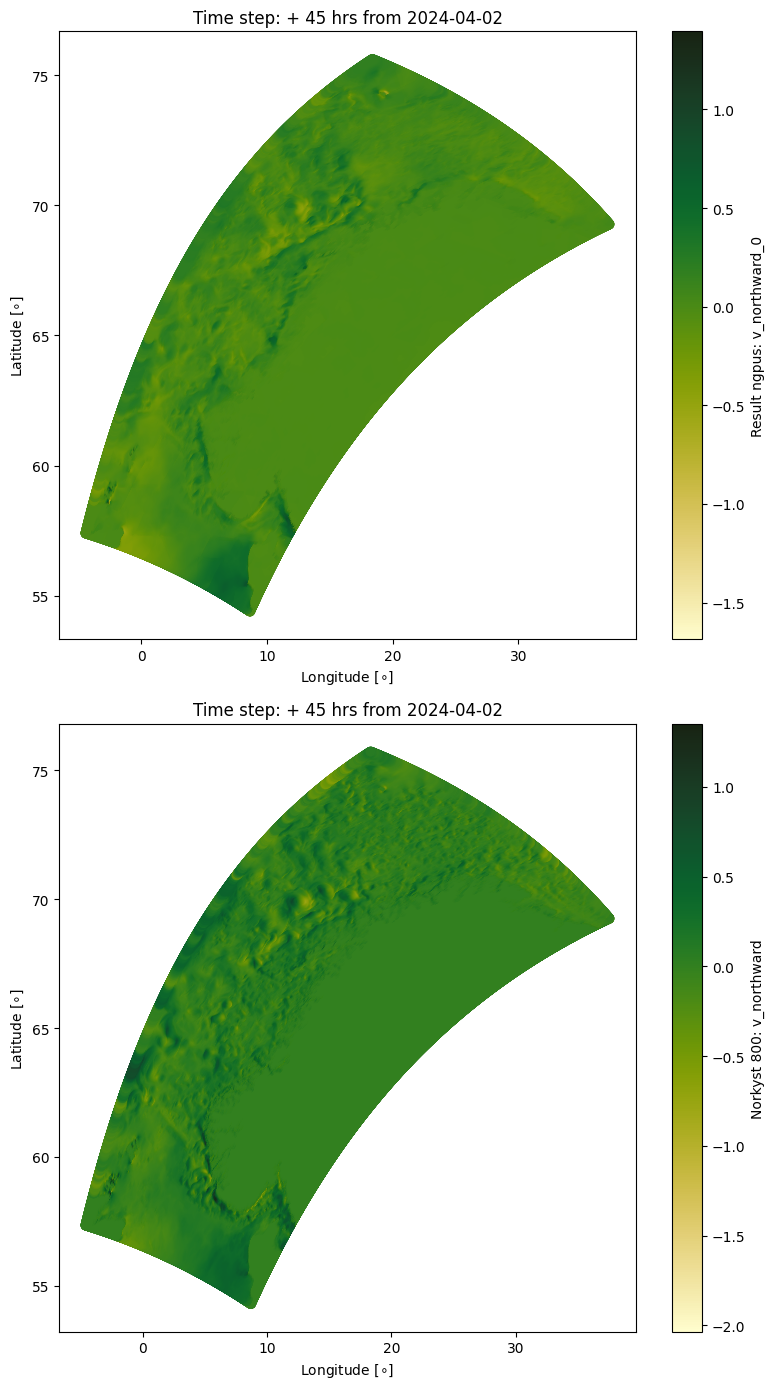

In [2]:
compare_two(file_path_1='/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc', file_path_2='/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240402.nc', file_path_3='/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240403.nc', variable1="v_northward_0", variable2="v_northward", dir='/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/figures', frame=16, start_time=0, title1='Vspeed_result', title2='Vspeed_norkyst')

In [ ]:
#lage en for res og en for norkyst for abs hastighet? 